# Importing The Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Loading The Data

In [2]:
df_videos  = pd.read_csv('../input/youtube/GBvideos.csv', error_bad_lines=False)

df_videos .head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


In [3]:
df_comments  = pd.read_csv('../input/youtube/GBcomments.csv', error_bad_lines=False)

df_comments .head()


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [4]:
df_videos.isnull().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

In [5]:
df_comments.shape

(718452, 4)

In [6]:
df_comments.dropna(inplace=True)

Emotion analysisEmotion analysisEmotion analysis# Remove emoticons

In [7]:
# 從評論數據框中移除任何帶有缺失數據的行
df_comments.dropna(inplace=True)

# 確保'likes'和'replies'列的數據類型為整數，以便一致性數據處理
df_comments['likes'] = df_comments['likes'].astype(int)
df_comments['replies'] = df_comments['replies'].astype(int)

In [8]:
df_comments["comment_text"] = df_comments["comment_text"].str.lower()
df_comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,it's more accurate to call it the m+ (1000) be...,0,0
1,jt2OHQh0HoQ,to be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"thank gosh, a place i can watch it without hav...",0,0
3,jt2OHQh0HoQ,what happened to the home button on the iphone...,0,0
4,jt2OHQh0HoQ,power is the disease. care is the cure. keep...,0,0


In [9]:
import string
import re

# 定義一個函數來移除標點符號和轉換文本為小寫
def clean_text(text):
    # 移除標點符號
    text = re.sub(f'[{string.punctuation}]', '', text)
    # 轉換文本為小寫
    text = text.lower()
    return text

# 應用清理函數到評論的文本
df_comments['comment_text'] = df_comments['comment_text'].apply(clean_text)

# 顯示處理後的前幾行數據
df_comments.head()


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,its more accurate to call it the m 1000 becaus...,0,0
1,jt2OHQh0HoQ,to be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,thank gosh a place i can watch it without havi...,0,0
3,jt2OHQh0HoQ,what happened to the home button on the iphone...,0,0
4,jt2OHQh0HoQ,power is the disease care is the cure keep c...,0,0


In [10]:
df_comments['comment_text'] = df_comments['comment_text'].str.replace('\d+', '')

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df_comments['comment_text'] = df_comments['comment_text'].apply(remove_emoji)
df_comments.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,its more accurate to call it the m because th...,0,0
1,jt2OHQh0HoQ,to be there with a samsung phone\n,1,0
2,jt2OHQh0HoQ,thank gosh a place i can watch it without havi...,0,0
3,jt2OHQh0HoQ,what happened to the home button on the iphone...,0,0
4,jt2OHQh0HoQ,power is the disease care is the cure keep c...,0,0


In [11]:
import plotly.graph_objects as go

# 计算每个视频的观看次数，并获取前10个观看次数最多的视频
top_videos_by_views = df_videos.nlargest(10, 'views')[['title', 'views']]

# 创建条形图
fig = go.Figure(data=[
    go.Bar(x=top_videos_by_views['title'], y=top_videos_by_views['views'], width=0.4)  # 调整width参数以改变条形的宽度
])

# 更新图表的布局
fig.update_layout(
    title_text='Top 5 Videos by Views',
    xaxis_title='Video ID',
    yaxis_title='Views',
    bargap=0.5  # 调整bargap参数以改变条形之间的间距
)

# 显示图表
fig.show()

In [12]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


# Emotion analysis

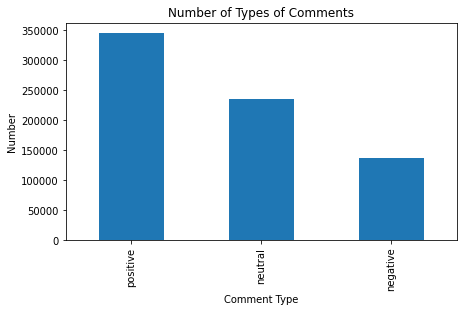

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# 初始化VADER情感分析器
analyzer = SentimentIntensityAnalyzer()

# 对每条评论进行情感分析
df_comments['vader_score'] = df_comments['comment_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# 分类情感倾向
df_comments['sentiment_type'] = df_comments['vader_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# 统计并绘制情感类型的分布
df_comments['sentiment_type'].value_counts().plot(kind='bar', figsize=(7, 4))
plt.title('Number of Types of Comments')
plt.xlabel('Comment Type')
plt.ylabel('Number')
plt.show()


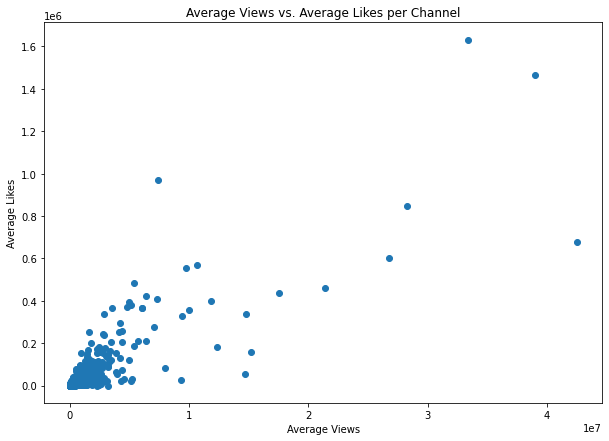

In [14]:
plt.figure(figsize=(10, 7))

df_channel = df_videos.groupby('channel_title').agg({'views': 'mean', 'likes': 'mean'})
plt.scatter(df_channel['views'], df_channel['likes'])
plt.xlabel('Average Views')
plt.ylabel('Average Likes')
plt.title('Average Views vs. Average Likes per Channel')
plt.show()


# Distribution of likes vs. views


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.



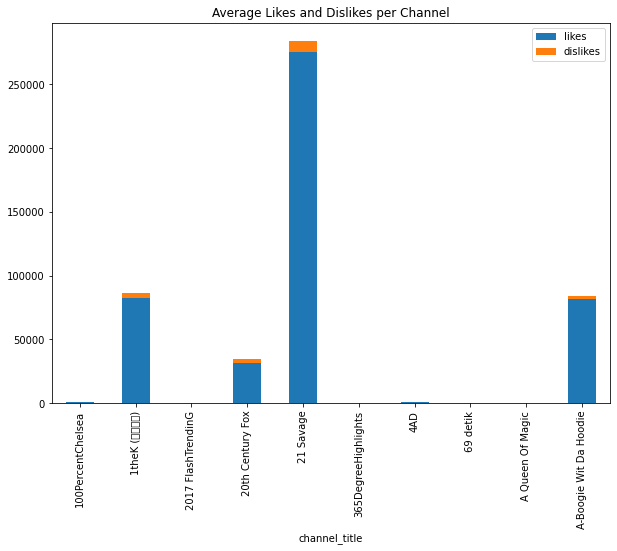

In [15]:
df_channel_likes_dislikes = df_videos.groupby('channel_title').agg({'likes': 'mean', 'dislikes': 'mean'})
df_channel_likes_dislikes.head(10).plot(kind='bar',figsize=(10, 7), stacked=True)
plt.title('Average Likes and Dislikes per Channel')
plt.show()


# Distribution of views by category


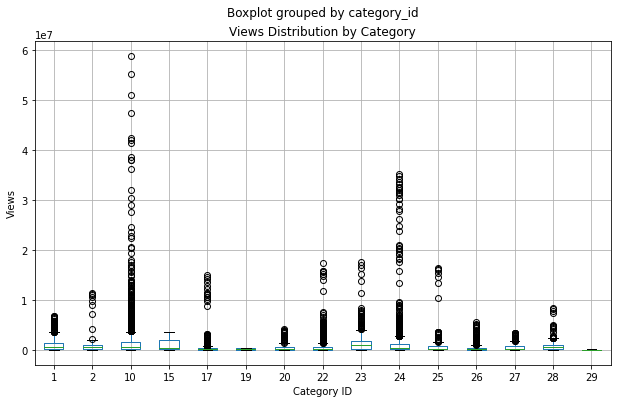

In [16]:
df_videos.boxplot(column='views', by='category_id', figsize=(10, 6))
plt.title('Views Distribution by Category')
plt.xlabel('Category ID')
plt.ylabel('Views')
plt.show()


# Channel activity


/opt/conda/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning:

Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.

/opt/conda/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning:

Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.

/opt/conda/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning:

Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from current font.

/opt/conda/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning:

Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from curr

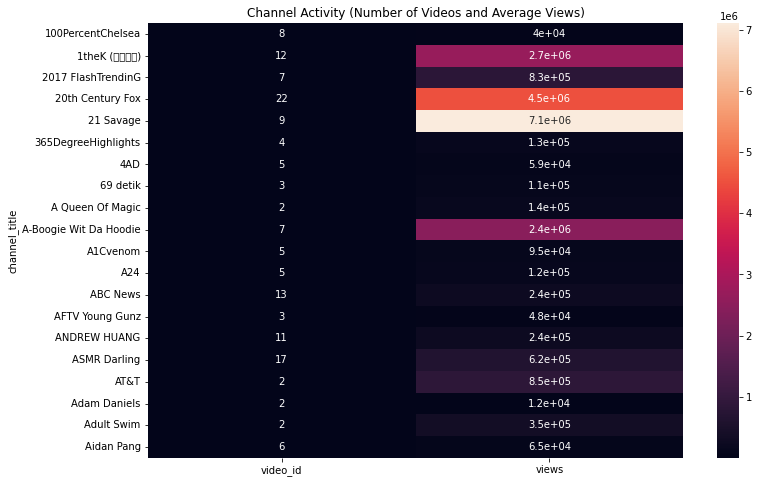

In [17]:
plt.figure(figsize=(12, 8))

df_channel_activity = df_videos.groupby('channel_title').agg({'video_id': 'count', 'views': 'mean'})
sns.heatmap(df_channel_activity.head(20), annot=True)
plt.title('Channel Activity (Number of Videos and Average Views)')
plt.show()


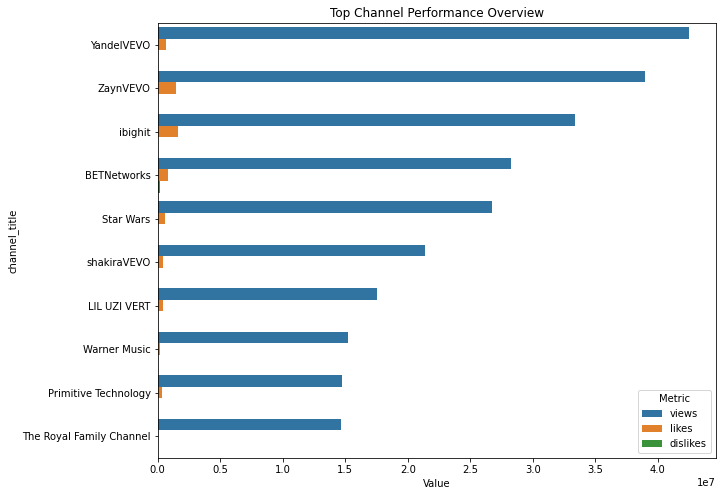

In [18]:
# 計算每個頻道的平均觀看次數、平均喜歡次數、平均不喜歡次數
channel_performance = df_videos.groupby('channel_title').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean'
}).reset_index()

# 選擇觀看次數最高的前10個頻道
top_channels = channel_performance.nlargest(10, 'views')

# 繪製每個頻道的綜合表現概覽圖
top_channels_melted = top_channels.melt(id_vars='channel_title', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 8))  # 調整圖表大小
sns.barplot(x='Value', y='channel_title', hue='Metric', data=top_channels_melted)
plt.title('Top Channel Performance Overview')
plt.show()

# Average views, average likes, average dislikes


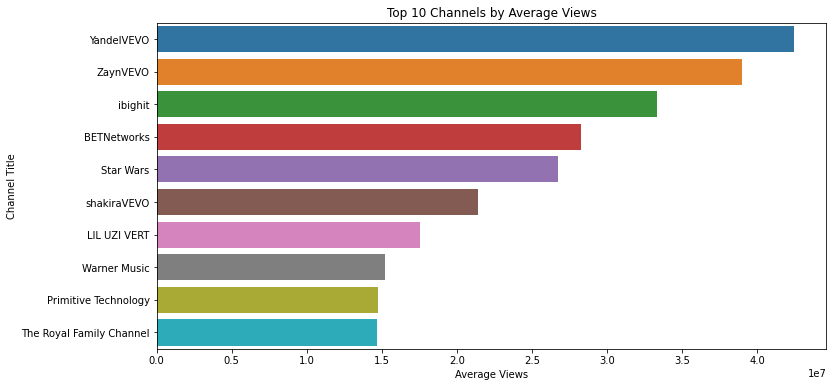

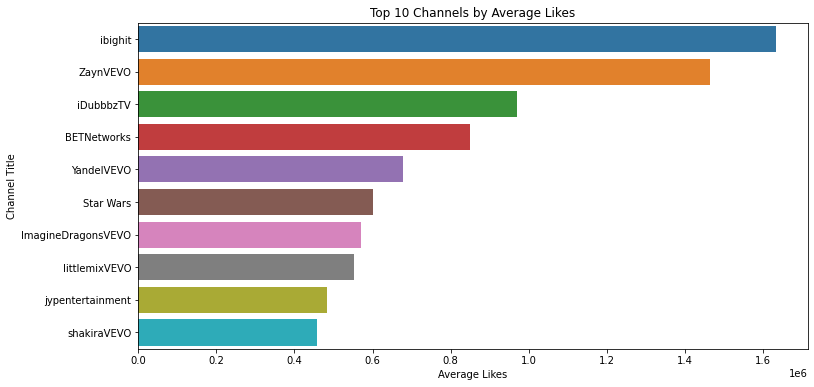

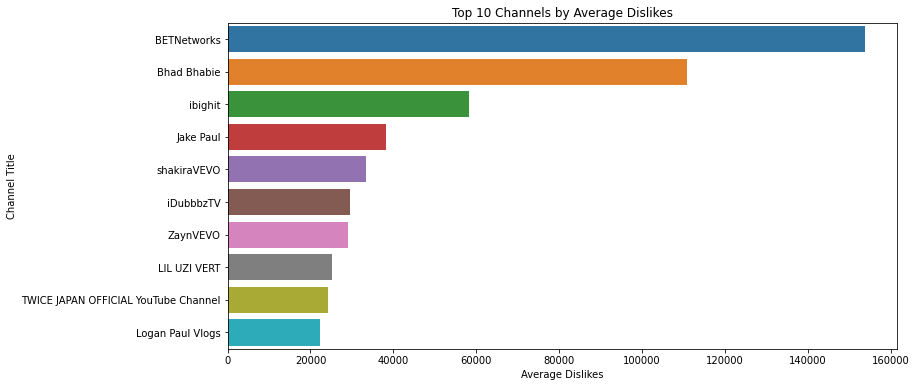

In [19]:
# 選擇平均觀看次數最高的前10個頻道
top_channels_views = channel_performance.nlargest(10, 'views')

# 使用長條圖來繪製每個頻道的平均觀看次數
plt.figure(figsize=(12, 6))
sns.barplot(x='views', y='channel_title', data=top_channels_views)
plt.title('Top 10 Channels by Average Views')
plt.xlabel('Average Views')
plt.ylabel('Channel Title')
plt.show()

# 選擇平均喜歡次數最高的前10個頻道
top_channels_likes = channel_performance.nlargest(10, 'likes')

# 使用長條圖來繪製每個頻道的平均喜歡次數
plt.figure(figsize=(12, 6))
sns.barplot(x='likes', y='channel_title', data=top_channels_likes)
plt.title('Top 10 Channels by Average Likes')
plt.xlabel('Average Likes')
plt.ylabel('Channel Title')
plt.show()

# 選擇平均不喜歡次數最高的前10個頻道
top_channels_dislikes = channel_performance.nlargest(10, 'dislikes')

# 使用長條圖來繪製每個頻道的平均不喜歡次數
plt.figure(figsize=(12, 6))
sns.barplot(x='dislikes', y='channel_title', data=top_channels_dislikes)
plt.title('Top 10 Channels by Average Dislikes')
plt.xlabel('Average Dislikes')
plt.ylabel('Channel Title')
plt.show()

array([<AxesSubplot:title={'center':'views'}, xlabel='category_id'>,
       <AxesSubplot:title={'center':'likes'}, xlabel='category_id'>],
      dtype=object)

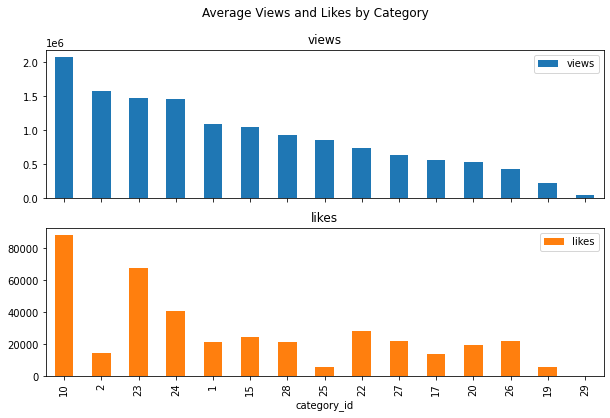

In [20]:
# 計算每個類別的平均觀看次數和平均按讚數
category_popularity = df_videos.groupby('category_id').agg({'views': 'mean', 'likes': 'mean'}).sort_values(by='views', ascending=False)

category_popularity.plot(kind='bar', subplots=True, figsize=(10, 6), title='Average Views and Likes by Category')


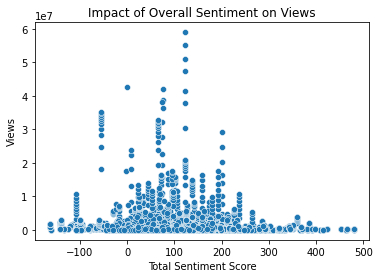

In [21]:
# 對每個影片計算總體情感分數
sentiment_by_video = df_comments.groupby('video_id')['vader_score'].sum()

# 將情感分數與視訊資料合併
df_videos = df_videos.join(sentiment_by_video, on='video_id')

# 使用散佈圖來探討情緒分數與觀看次數之間的關係
sns.scatterplot(x='vader_score', y='views', data=df_videos)
plt.title('Impact of Overall Sentiment on Views')
plt.xlabel('Total Sentiment Score')
plt.ylabel('Views')
plt.show()


In [22]:
# 創建一個新的DataFrame
df_sentiment = pd.DataFrame({'video_id': sentiment_by_video.index, 'total_sentiment': sentiment_by_video.values})

# 將DataFrame保存為CSV文件
df_sentiment.to_csv('sentiment_analysis_results.csv', index=False)


# EDA analysis


In [23]:
# 合併資料集
df_merged = pd.merge(df_videos, df_sentiment, on='video_id', how='inner')

# 類別ID到類別名稱的映射
cat_id_mapping = {
    2: 'Autos & Vehicles', 1: 'Film & Animation',
    10: 'Music', 15: 'Pets & Animals', 17: 'Sports',
    19: 'Travel & Events', 20: 'Gaming', 22: 'People & Blogs',
    23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics',
    26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology',
    29: 'Nonprofits & Activism', 43: 'Shows'
}

# 計算每個類別的平均情感得分
average_sentiment_by_category = df_merged.groupby('category_id')['total_sentiment'].mean().sort_values(ascending=False)
df_popular_category = pd.DataFrame(average_sentiment_by_category).reset_index()

# 映射category_id到類別名稱
df_popular_category['Category Name'] = df_popular_category['category_id'].map(cat_id_mapping)

# 重新調整列的順序
df_popular_category.columns = ['Category ID', 'Average Sentiment Score', 'Category Name']

# 調整列的順序，確保資料與列名相符
df_popular_category = df_popular_category[['Category ID', 'Category Name', 'Average Sentiment Score']]

print("最受歡迎的影片類別（平均情感得分）:")
df_popular_category



最受歡迎的影片類別（平均情感得分）:


,Category ID,Category Name,Average Sentiment Score
0,26,Howto & Style,186.090513
1,19,Travel & Events,138.286893
2,15,Pets & Animals,128.433887
3,22,People & Blogs,124.139410
4,10,Music,114.199542
5,24,Entertainment,78.849500
6,23,Comedy,72.895897
7,28,Science & Technology,69.209223
8,1,Film & Animation,66.435503
9,20,Gaming,55.539015


In [24]:
# 定義「熱門」影片的標準，例如觀看次數超過某個閾值
hot_video_threshold = 1000000
df_merged['is_hot'] = df_merged['views'] > hot_video_threshold

# 計算每個頻道的熱門影片數量
hot_videos_by_channel = df_merged.groupby('channel_title')['is_hot'].sum().sort_values(ascending=False)
df_hot_videos_channel = pd.DataFrame(hot_videos_by_channel).reset_index()
df_hot_videos_channel.columns = ['Channel Title', 'Number of Hot Videos']

df_hot_videos_channel.head()

,Channel Title,Number of Hot Videos
0,jacksfilms,34
1,Safiya Nygaard,30
2,BuzzFeedVideo,28
3,Meet Arnold,27
4,Marques Brownlee,27


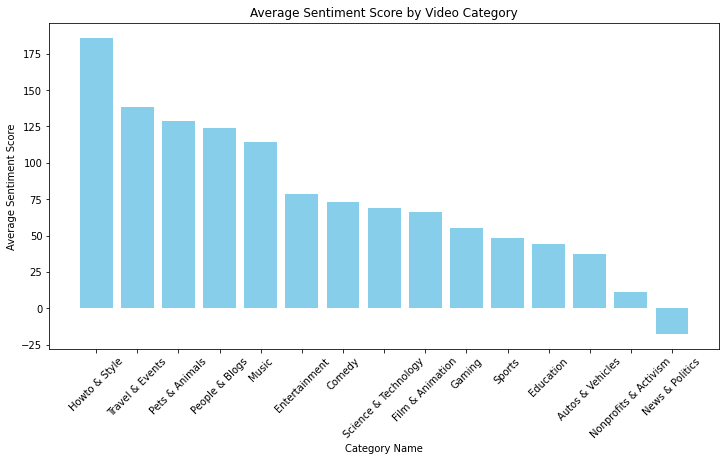

In [25]:
# 對類別進行排序，確保情緒得分最高的類別在頂部
df_popular_category_sorted = df_popular_category.sort_values(by='Average Sentiment Score', ascending=False)

# 创建条形图
plt.figure(figsize=(12, 6))
plt.bar(df_popular_category_sorted['Category Name'], df_popular_category_sorted['Average Sentiment Score'], color='skyblue')
plt.title('Average Sentiment Score by Video Category')
plt.xlabel('Category Name')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45) 
plt.show()


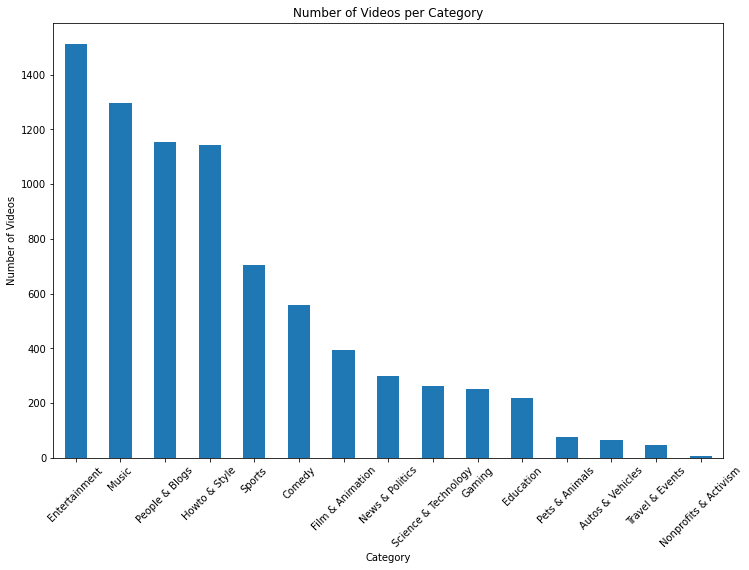

In [26]:
# 將 category_id 對應到特定的影片類別名稱
df_videos['category_name'] = df_videos['category_id'].map(cat_id_mapping)

# 計算每個類別的影片數量
category_counts = df_videos['category_name'].value_counts()

# 計算每個類別的平均觀看次數
average_views_by_category = df_videos.groupby('category_name')['views'].mean()

# 建立一個長條圖展示每個類別的影片數量
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Number of Videos per Category')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

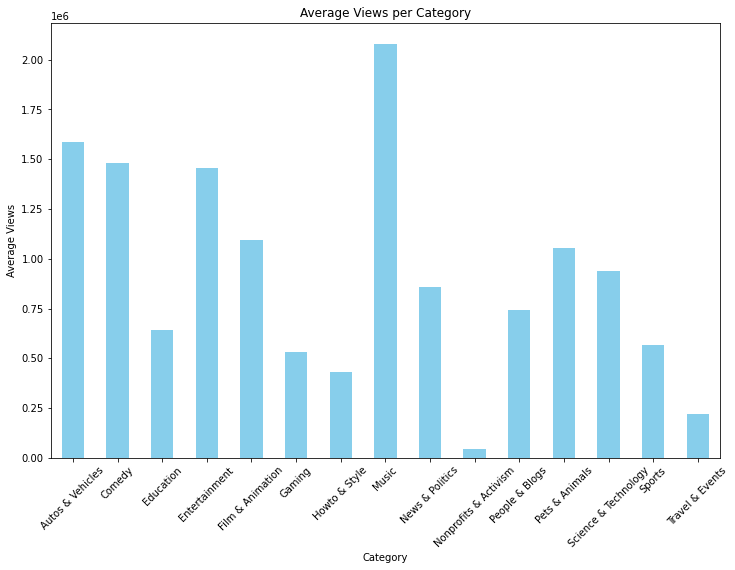

In [27]:
# 建立一個長條圖顯示每個類別的平均觀看次數
plt.figure(figsize=(12, 8))
average_views_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Views per Category')
plt.xlabel('Category')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()

In [28]:
# 計算每個影片的正面、負面和中性評論數量
df_comments['sentiment_type'] = df_comments['vader_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)
sentiment_counts_by_video = df_comments.groupby(['video_id', 'sentiment_type']).size().unstack(fill_value=0)

# 將情緒計數與原始影片資料集合併
df_merged = pd.merge(df_videos, sentiment_counts_by_video, left_on='video_id', right_index=True, how='left')

# 最受歡迎的影片類別的情感分數
popular_category_sentiments = df_merged.groupby('category_name')[['positive', 'negative', 'neutral']].sum()

# 定義“熱門”影片的標準
hot_video_threshold = 1000000
df_videos['is_hot'] = df_videos['views'] > hot_video_threshold

# 最受歡迎的影片類別的情感分數
hot_videos_by_channel = df_videos[df_videos['is_hot']].groupby('channel_title').size().nlargest(5)
hot_channel_sentiments = df_merged[df_merged['channel_title'].isin(hot_videos_by_channel.index)].groupby('channel_title')[['positive', 'negative', 'neutral']].sum()

print("最受欢迎的视频类别的情感分数:")
popular_category_sentiments

最受欢迎的视频类别的情感分数:


,positive,negative,neutral
category_name,,,
Autos & Vehicles,12593.0,8256.0,13174.0
Comedy,132314.0,65829.0,113651.0
Education,46669.0,32005.0,40528.0
Entertainment,363250.0,176633.0,287194.0
Film & Animation,90253.0,47581.0,77473.0
Gaming,50015.0,26233.0,37734.0
Howto & Style,381965.0,66458.0,167724.0
Music,333599.0,106962.0,280440.0
News & Politics,45013.0,50388.0,43524.0


In [29]:
print("\n热门视频最多的频道的情感分数:")
hot_channel_sentiments


热门视频最多的频道的情感分数:


,positive,negative,neutral
channel_title,,,
Brave Wilderness,7287.0,2266.0,7347.0
BuzzFeedVideo,7587.0,2439.0,7367.0
Marques Brownlee,11091.0,3404.0,6300.0
Safiya Nygaard,10865.0,2122.0,5806.0
jacksfilms,7502.0,6031.0,13356.0


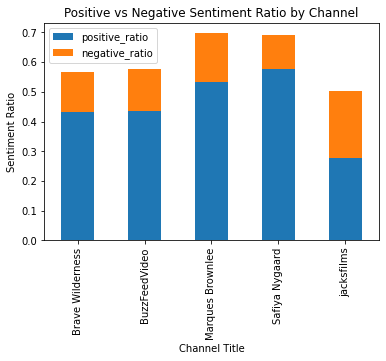

In [30]:
# 熱門頻道的正負情感比例
hot_channel_sentiments['positive_ratio'] = hot_channel_sentiments['positive'] / (hot_channel_sentiments['positive'] + hot_channel_sentiments['negative'] + hot_channel_sentiments['neutral'])
hot_channel_sentiments['negative_ratio'] = hot_channel_sentiments['negative'] / (hot_channel_sentiments['positive'] + hot_channel_sentiments['negative'] + hot_channel_sentiments['neutral'])

# 繪製正負情感比例圖
hot_channel_sentiments[['positive_ratio', 'negative_ratio']].plot(kind='bar', stacked=True)
plt.title('Positive vs Negative Sentiment Ratio by Channel')
plt.xlabel('Channel Title')
plt.ylabel('Sentiment Ratio')
plt.show()
